# Objectif du notebook

Import des données de tracking et début de processing basique

# Librairies et Données

In [45]:
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '../')
from scripts.tracking import TeamTracking 

In [2]:
data_directory = '../data/tracking'
file = 'g2312201_SecondSpectrum_tracking-produced.jsonl'
match_tracking_path = os.path.join(data_directory, file)

# < 20s
df_unstructured_tracking = pd.read_json(match_tracking_path, lines = True)

In [3]:
df_unstructured_tracking.head()

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,ball,live,lastTouch
0,1,0,0.00,1674387294150,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-0.58, 0.08, 0.34], 'speed': 8.97}",False,home
1,1,1,0.04,1674387294190,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-0.89, 0.09, 0.35000000000000003], 's...",True,away
2,1,2,0.08,1674387294230,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.2, 0.09, 0.36], 'speed': 9.11}",True,away
3,1,3,0.12,1674387294270,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.52, 0.1, 0.37], 'speed': 9.15}",True,away
4,1,4,0.16,1674387294310,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.85, 0.11, 0.37], 'speed': 9.15}",True,away


In [5]:
# Traitement de 1,5M de lignes en < 2s
home_tracking = TeamTracking(df_unstructured_tracking=df_unstructured_tracking)
home_tracking.df_tracking

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,speed,xyz
0,1,0,0.00,1674387294150,False,home,246319,0.00,"[16.93, 16.79, 0.0]"
0,1,0,0.00,1674387294150,False,home,192194,0.00,"[13.61, 0.11, 0.0]"
0,1,0,0.00,1674387294150,False,home,174349,0.00,"[3.04, 17.82, 0.0]"
0,1,0,0.00,1674387294150,False,home,96385,0.00,"[6.94, -8.83, 0.0]"
0,1,0,0.00,1674387294150,False,home,459038,0.00,"[5.21, 9.58, 0.0]"
...,...,...,...,...,...,...,...,...,...
144074,2,144074,2882.04,1674394107470,False,away,165677,0.77,"[-9.2, 14.65, 0.0]"
144074,2,144074,2882.04,1674394107470,False,away,175128,0.18,"[2.95, 2.06, 0.0]"
144074,2,144074,2882.04,1674394107470,False,away,447080,1.08,"[-11.49, 7.74, 0.0]"
144074,2,144074,2882.04,1674394107470,False,away,96535,2.00,"[-8.57, 21.25, 0.0]"


# Vitesse/Accelerations distances

## Vitesse

Pas besoin de la recalculer

In [56]:
df_home = HomeTracking.df_tracking
df_home = df_home.sort_values(['optaId','period','gameClock'])

dt=0.04

In [57]:
df_home.optaId.unique()

array(['165677', '174349', '175128', '186022', '186043', '191726',
       '192194', '242633', '246319', '447080', '459038', '463306',
       '96385', '96535'], dtype=object)

In [58]:
df_home = df_home.set_index(['optaId','period', 'gameClock'])

Text(0, 0.5, 'speed (m/s)')

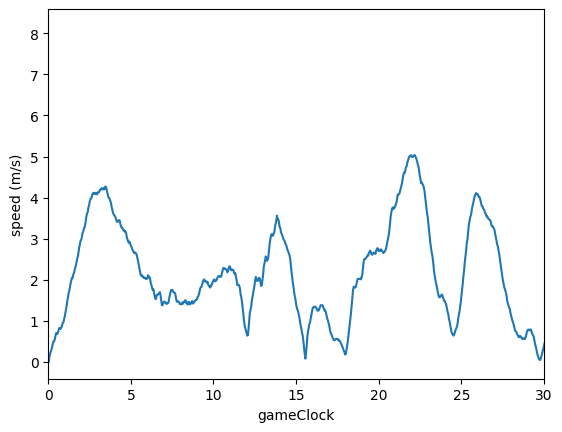

In [59]:
df_home.loc['174349', 1]['speed'].plot(xlim=[0,30])
plt.ylabel('speed (m/s)')

In [60]:
df_home

frameIdx      wallClock   live lastTouch  speed  \
optaId period gameClock                                                    
165677 1      0.00              0  1674387294150  False      home   0.00   
              0.04              1  1674387294190   True      away   0.00   
              0.08              2  1674387294230   True      away   0.10   
              0.12              3  1674387294270   True      away   0.12   
              0.16              4  1674387294310   True      away   0.20   
...                           ...            ...    ...       ...    ...   
96535  2      2881.88      144070  1674394107310  False      away   2.00   
              2881.92      144071  1674394107350  False      away   2.00   
              2881.96      144072  1674394107390  False      away   2.00   
              2882.00      144073  1674394107430  False      away   2.00   
              2882.04      144074  1674394107470  False      away   2.00   

                                         xyz  
optaId period gameClock                       
165677 1      0.00         [19.6, 5.35, 0.0]  
              0.04        [19.59, 5.35, 0.0]  
              0.08        [19.59, 5.35, 0.0]  
              0.12        [19.59, 5.35, 0.0]  
              0.16        [19.58, 5.35, 0.0]  
...                                      ...  
96535  2      2881.88    [-8.59, 20.93, 0.0]  
              2881.92    [-8.59, 21.01, 0.0]  
              2881.96    [-8.59, 21.09, 0.0]  
              2882.00    [-8.58, 21.17, 0.0]  
              2882.04    [-8.57, 21.25, 0.0]  

[1584825 rows x 6 columns]

It's very similar to what is described in https://soccermatics.readthedocs.io/en/latest/gallery/lesson8/plot_AccDecRatio.html. It is even smoother.

## Distance

In [61]:
(df_home.reset_index()
 .groupby(['optaId'])[['speed']]
 .agg(lambda group: np.trapz(group, dx=dt))
 .rename(columns={'speed':'distance'})
 .sort_values('distance', ascending=False)
)

,distance
optaId,
96385,11065.1646
192194,11053.7438
242633,10264.8838
463306,10220.6176
186043,9704.6166
165677,9572.9538
96535,9484.6808
174349,7708.9738
459038,7590.1518


Encore une fois c'est très similaire avec le tuto. 

## Accelration

In [70]:
df_home['acceleration'] = (df_home
                           .groupby(level=['optaId', 'period'], group_keys=False)['speed']
                           .diff()/dt)

<Axes: xlabel='gameClock'>

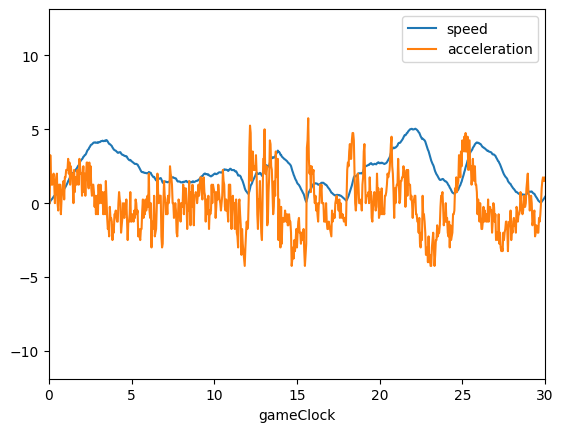

In [72]:
df_home.loc['174349', 1][['speed', 'acceleration']].plot(xlim=[0,30])
